#TP #2 - Parcimonie

## Antonin GAY - MVA 2018-19

## Denoising with sparsity constraint in the starlet transform

Nous utilisons les deux méthodes Soft et Hard, pour débruiter l'image, bruitée avec un bruit gaussien. Poue être sûr d'obtenir le meilleur résultat, nous déterminons expérimentalement le $k$ optimal tel que $\lambda = k * \sigma$ permettent le meilleur débruitage. Nous mesurons la qualité du débruitage grâce à l'erreur quadratique moyenne (normalisée) (MSE).

Voici tout d'abord l'image originale et sa version bruitée.

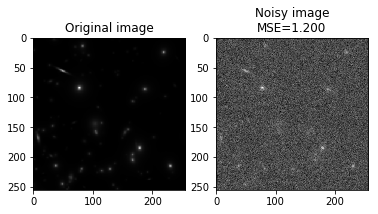

In [3]:
from TP2.func_TP2 import *

simu_sky_mat = loadmat('TP2/simu_sky.mat')
simu_sky = simu_sky_mat['simu_sky']

sigma = np.max(simu_sky) / 10.
simu_sky_noise = simu_sky + np.random.normal(size=np.shape(simu_sky), scale=sigma)
    
plt.figure()

plt.subplot(121)
plt.imshow(simu_sky, cmap='gray')
plt.title('Original image')

plt.subplot(122)
plt.imshow(simu_sky_noise, cmap='gray')
plt.title('Noisy image\nMSE=%.3f' % mse(simu_sky_noise, simu_sky))

plt.show()


Nous réalisons ensuite deux boucles pour déterminer les meilleures valeurs de $k$ pour le soft et le hard thresholing:

Determining best k_hard:   0%|          | 0/50 [00:00<?, ?it/s]

Determining best k_hard:   2%|▏         | 1/50 [00:00<00:21,  2.25it/s]

Determining best k_hard:   4%|▍         | 2/50 [00:01<00:23,  2.08it/s]

Determining best k_hard:   6%|▌         | 3/50 [00:01<00:24,  1.88it/s]

Determining best k_hard:   8%|▊         | 4/50 [00:02<00:24,  1.84it/s]

Determining best k_hard:  10%|█         | 5/50 [00:02<00:21,  2.10it/s]

Determining best k_hard:  12%|█▏        | 6/50 [00:02<00:18,  2.37it/s]

Determining best k_hard:  14%|█▍        | 7/50 [00:03<00:16,  2.60it/s]

Determining best k_hard:  16%|█▌        | 8/50 [00:03<00:15,  2.74it/s]

Determining best k_hard:  18%|█▊        | 9/50 [00:03<00:15,  2.71it/s]

Determining best k_hard:  20%|██        | 10/50 [00:04<00:14,  2.72it/s]

Determining best k_hard:  22%|██▏       | 11/50 [00:04<00:15,  2.57it/s]

Determining best k_hard:  24%|██▍       | 12/50 [00:05<00:14,  2.61it/s]

Determining best k_hard:  26%|██▌       | 13/50 [00:05<00:12,  2.85it/s]

Determining best k_hard:  28%|██▊       | 14/50 [00:05<00:12,  2.92it/s]

Determining best k_hard:  30%|███       | 15/50 [00:05<00:11,  3.00it/s]

Determining best k_hard:  32%|███▏      | 16/50 [00:06<00:11,  2.92it/s]

Determining best k_hard:  34%|███▍      | 17/50 [00:06<00:11,  2.83it/s]

Determining best k_hard:  36%|███▌      | 18/50 [00:06<00:10,  2.96it/s]

Determining best k_hard:  38%|███▊      | 19/50 [00:07<00:10,  3.07it/s]

Determining best k_hard:  40%|████      | 20/50 [00:07<00:09,  3.21it/s]

Determining best k_hard:  42%|████▏     | 21/50 [00:07<00:08,  3.24it/s]

Determining best k_hard:  44%|████▍     | 22/50 [00:08<00:08,  3.17it/s]

Determining best k_hard:  46%|████▌     | 23/50 [00:08<00:08,  3.21it/s]

Determining best k_hard:  48%|████▊     | 24/50 [00:08<00:07,  3.30it/s]

Determining best k_hard:  50%|█████     | 25/50 [00:09<00:07,  3.39it/s]

Determining best k_hard:  52%|█████▏    | 26/50 [00:09<00:06,  3.46it/s]

Determining best k_hard:  54%|█████▍    | 27/50 [00:09<00:06,  3.45it/s]

Determining best k_hard:  56%|█████▌    | 28/50 [00:09<00:06,  3.49it/s]

Determining best k_hard:  58%|█████▊    | 29/50 [00:10<00:06,  3.39it/s]

Determining best k_hard:  60%|██████    | 30/50 [00:10<00:06,  3.07it/s]

Determining best k_hard:  62%|██████▏   | 31/50 [00:10<00:05,  3.23it/s]

Determining best k_hard:  64%|██████▍   | 32/50 [00:11<00:05,  3.37it/s]

Determining best k_hard:  66%|██████▌   | 33/50 [00:11<00:04,  3.44it/s]

Determining best k_hard:  68%|██████▊   | 34/50 [00:11<00:04,  3.47it/s]

Determining best k_hard:  70%|███████   | 35/50 [00:11<00:04,  3.52it/s]

Determining best k_hard:  72%|███████▏  | 36/50 [00:12<00:04,  2.96it/s]

Determining best k_hard:  74%|███████▍  | 37/50 [00:12<00:04,  3.11it/s]

Determining best k_hard:  76%|███████▌  | 38/50 [00:13<00:04,  2.56it/s]

Determining best k_hard:  78%|███████▊  | 39/50 [00:13<00:04,  2.65it/s]

Determining best k_hard:  80%|████████  | 40/50 [00:13<00:03,  2.68it/s]

Determining best k_hard:  82%|████████▏ | 41/50 [00:14<00:03,  2.79it/s]

Determining best k_hard:  84%|████████▍ | 42/50 [00:14<00:02,  2.90it/s]

Determining best k_hard:  86%|████████▌ | 43/50 [00:14<00:02,  2.99it/s]

Determining best k_hard:  88%|████████▊ | 44/50 [00:15<00:02,  2.71it/s]

Determining best k_hard:  90%|█████████ | 45/50 [00:15<00:01,  2.92it/s]

Determining best k_hard:  92%|█████████▏| 46/50 [00:15<00:01,  3.12it/s]

Determining best k_hard:  94%|█████████▍| 47/50 [00:16<00:00,  3.27it/s]

Determining best k_hard:  96%|█████████▌| 48/50 [00:16<00:00,  3.33it/s]

Determining best k_hard:  98%|█████████▊| 49/50 [00:16<00:00,  3.38it/s]

Determining best k_hard: 100%|██████████| 50/50 [00:17<00:00,  2.56it/s]

Determining best k_soft:   0%|          | 0/50 [00:00<?, ?it/s]

Determining best k_soft:   2%|▏         | 1/50 [00:00<00:14,  3.46it/s]

Determining best k_soft:   4%|▍         | 2/50 [00:00<00:17,  2.81it/s]

Determining best k_soft:   6%|▌         | 3/50 [00:01<00:20,  2.31it/s]

Determining best k_soft:   8%|▊         | 4/50 [00:01<00:22,  2.09it/s]

Determining best k_soft:  10%|█         | 5/50 [00:02<00:25,  1.79it/s]

Determining best k_soft:  12%|█▏        | 6/50 [00:03<00:23,  1.88it/s]

Determining best k_soft:  14%|█▍        | 7/50 [00:03<00:19,  2.19it/s]

Determining best k_soft:  16%|█▌        | 8/50 [00:03<00:16,  2.48it/s]

Determining best k_soft:  18%|█▊        | 9/50 [00:04<00:18,  2.19it/s]

Determining best k_soft:  20%|██        | 10/50 [00:04<00:20,  1.97it/s]

Determining best k_soft:  22%|██▏       | 11/50 [00:05<00:21,  1.81it/s]

Determining best k_soft:  24%|██▍       | 12/50 [00:06<00:23,  1.62it/s]

Determining best k_soft:  26%|██▌       | 13/50 [00:07<00:26,  1.37it/s]

Determining best k_soft:  28%|██▊       | 14/50 [00:08<00:25,  1.41it/s]

Determining best k_soft:  30%|███       | 15/50 [00:08<00:26,  1.34it/s]

Determining best k_soft:  32%|███▏      | 16/50 [00:09<00:23,  1.44it/s]

Determining best k_soft:  34%|███▍      | 17/50 [00:10<00:23,  1.41it/s]

Determining best k_soft:  36%|███▌      | 18/50 [00:11<00:25,  1.25it/s]

Determining best k_soft:  38%|███▊      | 19/50 [00:12<00:24,  1.26it/s]

Determining best k_soft:  40%|████      | 20/50 [00:12<00:23,  1.29it/s]

Determining best k_soft:  42%|████▏     | 21/50 [00:13<00:20,  1.38it/s]

Determining best k_soft:  44%|████▍     | 22/50 [00:13<00:19,  1.47it/s]

Determining best k_soft:  46%|████▌     | 23/50 [00:14<00:19,  1.38it/s]

Determining best k_soft:  48%|████▊     | 24/50 [00:15<00:18,  1.41it/s]

Determining best k_soft:  50%|█████     | 25/50 [00:15<00:16,  1.54it/s]

Determining best k_soft:  52%|█████▏    | 26/50 [00:16<00:12,  1.87it/s]

Determining best k_soft:  54%|█████▍    | 27/50 [00:16<00:10,  2.19it/s]

Determining best k_soft:  56%|█████▌    | 28/50 [00:16<00:08,  2.49it/s]

Determining best k_soft:  58%|█████▊    | 29/50 [00:17<00:09,  2.28it/s]

Determining best k_soft:  60%|██████    | 30/50 [00:17<00:09,  2.03it/s]

Determining best k_soft:  62%|██████▏   | 31/50 [00:18<00:10,  1.86it/s]

Determining best k_soft:  64%|██████▍   | 32/50 [00:19<00:10,  1.65it/s]

Determining best k_soft:  66%|██████▌   | 33/50 [00:20<00:11,  1.51it/s]

Determining best k_soft:  68%|██████▊   | 34/50 [00:20<00:10,  1.58it/s]

Determining best k_soft:  70%|███████   | 35/50 [00:21<00:09,  1.60it/s]

Determining best k_soft:  72%|███████▏  | 36/50 [00:21<00:07,  1.87it/s]

Determining best k_soft:  74%|███████▍  | 37/50 [00:22<00:06,  1.90it/s]

Determining best k_soft:  76%|███████▌  | 38/50 [00:22<00:06,  1.80it/s]

Determining best k_soft:  78%|███████▊  | 39/50 [00:23<00:05,  1.94it/s]

Determining best k_soft:  80%|████████  | 40/50 [00:23<00:04,  2.25it/s]

Determining best k_soft:  82%|████████▏ | 41/50 [00:23<00:04,  2.16it/s]

Determining best k_soft:  84%|████████▍ | 42/50 [00:24<00:03,  2.43it/s]

Determining best k_soft:  86%|████████▌ | 43/50 [00:24<00:02,  2.71it/s]

Determining best k_soft:  88%|████████▊ | 44/50 [00:24<00:02,  2.93it/s]

Determining best k_soft:  90%|█████████ | 45/50 [00:25<00:01,  3.12it/s]

Determining best k_soft:  92%|█████████▏| 46/50 [00:25<00:01,  3.26it/s]

Determining best k_soft:  94%|█████████▍| 47/50 [00:25<00:01,  2.95it/s]

Determining best k_soft:  96%|█████████▌| 48/50 [00:26<00:00,  2.27it/s]

Determining best k_soft:  98%|█████████▊| 49/50 [00:27<00:00,  1.79it/s]

Determining best k_soft: 100%|██████████| 50/50 [00:27<00:00,  1.69it/s]

Text(0, 0.5, 'MSE')

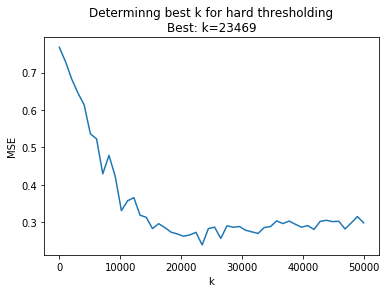

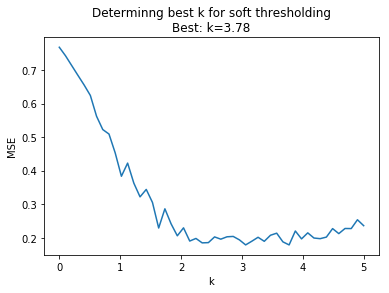

In [4]:
# Determine best k for Hard Thresholding
list_mse_h=[]
list_k_h = np.linspace(0,50000,50)
for k in tqdm(list_k_h, desc='Determining best k_hard'):
    list_mse_h.append(mse(simu_sky, hard_denois(simu_sky_noise, lam=k * sigma)))

# Determine best k for Soft Thresholding
list_mse_s=[]
list_k_s = np.linspace(0,5,50)
for k in tqdm(list_k_s, desc='Determining best k_soft'):
    list_mse_s.append(mse(simu_sky, soft_denois(simu_sky_noise, lam=k * sigma)))

# Computing best images
k_soft = list_k_s[np.argmin(list_mse_s)]
k_hard = list_k_h[np.argmin(list_mse_h)]

plt.figure()
plt.plot(list_k_h, list_mse_h)
plt.title('Determinng best k for hard thresholding\nBest: k=%d' % k_hard)
plt.xlabel('k')
plt.ylabel('MSE')

plt.figure()
plt.plot(list_k_s, list_mse_s)
plt.title('Determinng best k for soft thresholding\nBest: k=%.2f' % k_soft)
plt.xlabel('k')
plt.ylabel('MSE')


Finalement, nous générons les images débruitées et les affichons ci-dessous.

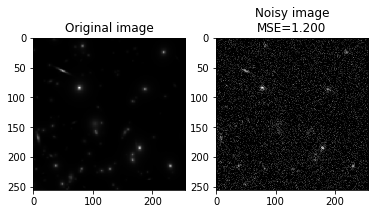

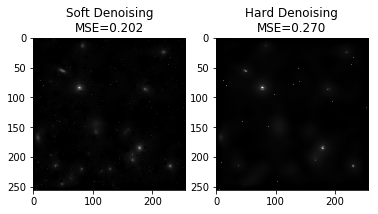

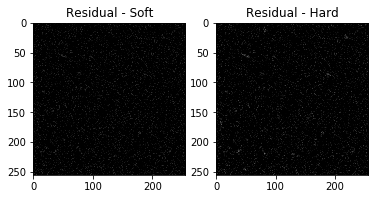

In [14]:
image_rebuilt_soft = soft_denois(simu_sky_noise, lam=2 * sigma)
image_rebuilt_hard = hard_denois(simu_sky_noise, lam=20000 * sigma)

vmin, vmax = np.min(simu_sky), np.max(simu_sky)

# Plotting all
plt.figure()
plt.subplot(121)
plt.imshow(simu_sky, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Original image')
plt.subplot(122)
plt.imshow(simu_sky_noise, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Noisy image\nMSE=%.3f' % mse(simu_sky_noise, simu_sky))

plt.figure()
plt.subplot(121)
plt.imshow(image_rebuilt_soft, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Soft Denoising\nMSE=%.3f' % mse(image_rebuilt_soft, simu_sky))
plt.subplot(122)
plt.imshow(image_rebuilt_hard, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Hard Denoising\nMSE=%.3f' % mse(image_rebuilt_hard, simu_sky))

plt.figure()
plt.subplot(121)
plt.imshow(simu_sky_noise - image_rebuilt_soft, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Residual - Soft')
plt.subplot(122)
plt.imshow(simu_sky_noise - image_rebuilt_hard, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Residual - Hard')

plt.show()

Ces images nous permettent de faire plusieurs commentaires.

Premièrement, visuellement, le soft-thresholding semble débruiter plus efficacement, car tout le bruit a alors disparu, contrairement au hard thresholding, qui en laisse certains si on ne veut pas supprimer tous les motifs de l'image. Cependant, le soft thresholding crée un effet de flou (blurring) autour des détails de l'image originale, que le hard ne fait pas, laissant les points tels quels.

Au niveau de la norme quadratique moyenne, le soft obtient un légèrement meilleur résultat que le hard, mais les deux obtiennent un résultat bien meilleur que l'image bruitée d'orignie. Ces deux méthodes présentent donc des résultats de débruitages important, avec chacun leur avantage.

## Sparsity Based Deblurring

Dans cette partie, nous appliquons un opérateur de flou (blur) sur notre image d'origine, puis la bruitons. L'objectif est alors de la déflouter en utilisant des opérateurs proximaux, et plus particulièrement, l'algorithme récursif Forward Backward Splitting.

Dans un premier temps, chargeons notre image et flouttons la:

Convolution in 22.569058418273926s

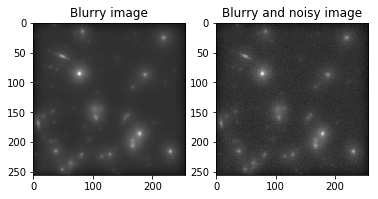

In [9]:
from TP2.func_TP2 import *
%matplotlib inline

simu_sky_mat = loadmat('TP2/simu_sky.mat')
simu_sky = simu_sky_mat['simu_sky']

psf_mat = loadmat('TP2/simu_psf.mat')
psf = psf_mat['simu_psf']

start_time = time()
simu_sky_blur = convolve2d(simu_sky, psf, mode='same')
print('Convolution in %ss' % (time() - start_time))

sigma = np.mean(simu_sky) / 20.
simu_sky_blur_noise = simu_sky_blur + np.random.normal(size=np.shape(simu_sky), scale=sigma)

plt.figure()
plt.subplot(121)
plt.imshow(simu_sky_blur, cmap='gray')
plt.title('Blurry image')
plt.subplot(122)
plt.imshow(simu_sky_blur_noise, cmap='gray')
plt.title('Blurry and noisy image')
plt.show(block=False)


Nous appliquons alors l'algorithme récursif. Celui-ci va tenter de trouver la représentation dans l'espace des starlet $\alpha$ qui minimisera la différence (MSE) entre l'image floutée bruitée $b=Hx+n$ et sa transformée inverse floutée par le même filtre $\hat{x}=H \Psi \alpha$. Ainsi, l'image ainsi obtenue, avant floutage, sera proche de notre image d'origine.

Pour réaliser cela, l'algorithme utilise une sorte de descente du gradient, via une récurrence.

Le résultat obtenu est présenté sur l'image suivante.

Iterating FBS:   0%|          | 0/1 [00:00<?, ?it/s]

Iterating FBS: 100%|██████████| 1/1 [00:36<00:00, 36.48s/it]

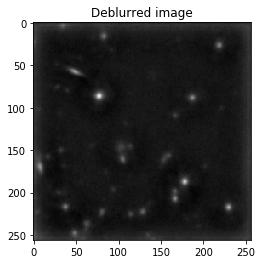

In [4]:
gamma = 5 * float(1 / (2 * (np.linalg.norm(psf)**2)))
lamb = 3 * sigma
new_im = ForBackSplit(im=simu_sky_blur_noise, h=psf, nb_iter=1, gamma=gamma, lam=lamb, h1d=h1d_default)

plt.figure()
plt.imshow(new_im, cmap='gray')
plt.title('Deblurred image')
plt.show()


Nous observons une légère réduction du flou, ainsi que du bruit sur l'image obtenue. Néanmoins, ce résultat est obtenu avec une seule itération, car un plus grand nombre d'itérations donne des résultats aberrants, comme montré juste en-dessous pour 2 itérations.


Iterating FBS:   0%|          | 0/2 [00:00<?, ?it/s]

Iterating FBS:  50%|█████     | 1/2 [00:31<00:31, 31.40s/it]

Iterating FBS: 100%|██████████| 2/2 [01:01<00:00, 31.14s/it]

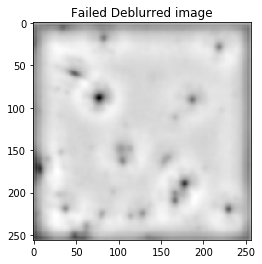

In [6]:
gamma = 5 * float(1 / (2 * (np.linalg.norm(psf)**2)))
lamb = 3 * sigma
new_im = ForBackSplit(im=simu_sky_blur_noise, h=psf, nb_iter=2, gamma=gamma, lam=lamb, h1d=h1d_default)

plt.figure()
plt.imshow(new_im, cmap='gray')
plt.title('Failed Deblurred image')
plt.show()


Je me dois de reconnaître que cela pourrait être dû à mon implémentation. Cependant, ce phénomène pourrait trouver son origine ailleurs. L'algorithme se comportant comme une descente de gradient, le coefficient du gradient pourrait être trop grand, on ne converge alors plus vers la solution mais divergeons. On pourrait alors tenter de résoudre ce problème soit avec un $\gamma$ dégressif, qui réduit à chaque itération, soit un bien plus faible $\gamma$ dès le début, qui augmenterait le nombre d'itérations nécessaire pour une convergence néanmoins (ce que mon PC ne va pas apprécier, mais qui est réalisé juste en dessous).


Iterating FBS:   0%|          | 0/5 [00:00<?, ?it/s]

Iterating FBS:  20%|██        | 1/5 [00:35<02:23, 35.89s/it]

Iterating FBS:  40%|████      | 2/5 [01:06<01:42, 34.28s/it]

Iterating FBS:  60%|██████    | 3/5 [01:36<01:06, 33.15s/it]

Iterating FBS:  80%|████████  | 4/5 [02:07<00:32, 32.33s/it]

Iterating FBS: 100%|██████████| 5/5 [02:37<00:00, 31.75s/it]

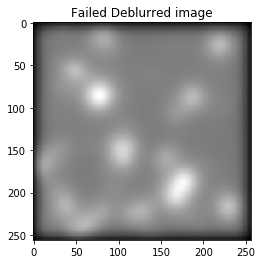

In [13]:
gamma = 5 * float(1 / (1000 * (np.linalg.norm(psf)**2)))
lamb = 3 * sigma
new_im = ForBackSplit(im=simu_sky_blur_noise, h=psf, nb_iter=5, gamma=gamma, lam=lamb, h1d=h1d_default)

plt.figure()
plt.imshow(new_im, cmap='gray')
plt.title('Failed Deblurred image')
plt.show()


Cette solution s'est finalement avérée bien peu efficace, l'image obtenu étant plus floue que celle d'origine.

## Application of proximal algorithm to inpainting

Nous modifions la fonction précédente pour prendre en compte un cas d'inpainting, où une partie des pixels d'une image ont été supprimés. Cela se met en équation sous la forme $b=M \odot x$, où $M$ est le masque binaire et $\odot$ l'opération multiplication terme à terme.


Masking in 0.0019991397857666016s

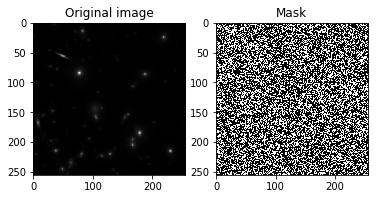

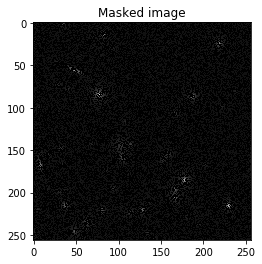

In [15]:
from TP2.func_TP2 import *
%matplotlib inline

simu_sky_mat = loadmat('TP2/simu_sky.mat')
simu_sky = simu_sky_mat['simu_sky']

mask = np.random.binomial(1, 0.4, size=np.shape(simu_sky))

start_time = time()
simu_sky_masked = np.multiply(simu_sky, mask)
print('Masking in %ss' % (time() - start_time))

plt.figure()
plt.subplot(121)
plt.imshow(simu_sky, cmap='gray')
plt.title('Original image')
plt.subplot(122)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.show(block=False)

plt.figure()
plt.imshow(simu_sky_masked, cmap='gray')
plt.title('Masked image')
plt.show(block=False)



Pour corriger cette modification de l'image, nous utilisons le même algorithme que précédemment, modifié pour l'occasion. Pour cela, les opérations de convolutions présentes précédemment ont été modifiées par des multiplications terme à terme. La seconde difficulté est d'implémenter l'opération inverse du masquage. Pour cela, une première approximation peut être, comme précédemment, de prendre le conjugué de la matrice M.


Iterating FBS:   0%|          | 0/7 [00:00<?, ?it/s]

Iterating FBS:  14%|█▍        | 1/7 [00:00<00:02,  2.37it/s]

Iterating FBS:  29%|██▊       | 2/7 [00:00<00:02,  2.42it/s]

Iterating FBS:  43%|████▎     | 3/7 [00:01<00:01,  2.60it/s]

Iterating FBS:  57%|█████▋    | 4/7 [00:01<00:01,  2.61it/s]

Iterating FBS:  71%|███████▏  | 5/7 [00:01<00:00,  2.59it/s]

Iterating FBS:  86%|████████▌ | 6/7 [00:02<00:00,  2.54it/s]

Iterating FBS: 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

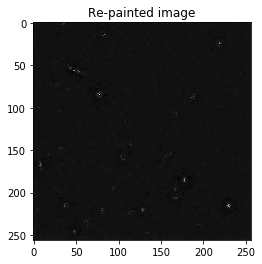

In [21]:
gamma = 5 * float(1 / (2 * (np.linalg.norm(psf)**2)))
lamb = 3 * sigma
new_im = ForBackSplit_Inp(im=simu_sky_masked, mask=mask, nb_iter=7, gamma=gamma, lam=lamb, h1d=h1d_default)

plt.figure()
plt.imshow(new_im, cmap='gray')
plt.title('Re-painted image')
plt.show()


Cette fois-ci, l'algorithme d'avère un peu plus efficace. Même si les formes ne sont pas toutes retrouvées, certains trous sont comblés. Néanmoins, on observe qu'on a perdu en détail par rapport à l'image d'origine : certaines étoiles, petites, ont trop disparues pour être récupérées, et celles qui sont plus larges n'ont pas récupéré totalment leur forme d'origine non plus.